# Just some notes on PCA in Python

**Guillermo Moncecchi**

This notebook contains just some code notes on Principal Component Analysis, based on a very simple example.  If you want the original, much better explanation, refer to [this](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html) page from Sebastian Raschka.

In [3]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
np.set_printoptions(suppress=True,precision=3)
from matplotlib.patches import FancyArrowPatch

Let us define a very simple dataset, with 6 people, identified by their heigth, weigth, and the length of their middle finger (?). Each column is an instance, with 3 attributes (we use this format to directly call the np.cov() function 

In [4]:
X_men=np.array([[1.97,110,5],[1.80,70,4.8],[1.70,90,4.9]]).transpose()
X_women=np.array([[1.65,52,4.7],[1.75,65,4.8],[1.67,58,4.6]]).transpose()

X = np.hstack((X_men,X_women))
print (X)

[[   1.97    1.8     1.7     1.65    1.75    1.67]
 [ 110.     70.     90.     52.     65.     58.  ]
 [   5.      4.8     4.9     4.7     4.8     4.6 ]]


In [5]:
mean=np.mean(X,axis=1)
std=np.std(X,axis=1)
var=np.var(X,axis=1)

print ("Means:",mean)
print ("Standard deviations:",std)
print ("Variances:",var)

Means: [  1.757  74.167   4.8  ]
Standard deviations: [  0.108  19.953   0.129]
Variances: [   0.012  398.139    0.017]


Rescale values

In [35]:
def scale_linear_byrow(X):
    mins = np.min(X, axis=1).reshape(3,1)
    maxs = np.max(X, axis=1).reshape(3,1)
    rng = maxs - mins
    return ((X - mins)/rng)

X_r=scale_linear_byrow(X)
print(X_r)



[[ 1.     0.469  0.156  0.     0.313  0.063]
 [ 1.     0.31   0.655  0.     0.224  0.103]
 [ 1.     0.5    0.75   0.25   0.5    0.   ]]


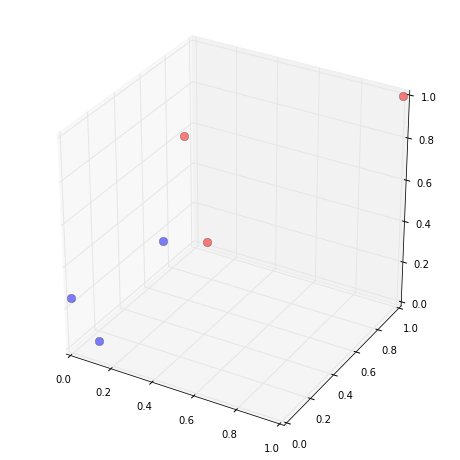

In [36]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(X_r[0,0:3], X_r[1,0:3], X_r[2,0:3], 'o', markersize=8, color='red', alpha=0.5, label='class1')
ax.plot(X_r[0,3:6], X_r[1,3:6], X_r[2,3:6], 'o', markersize=8, color='blue', alpha=0.5, label='class1')



plt.show()


Calculate mean, standard deviation and variance for every attribute, using the axis property of each of the methods

In [37]:
mean=np.mean(X_r,axis=1)
std=np.std(X_r,axis=1)
var=np.var(X_r,axis=1)

print ("Means:",mean)
print ("Standard deviations:",std)
print ("Variances:",var)
#mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

Means: [ 0.333  0.382  0.5  ]
Standard deviations: [ 0.336  0.344  0.323]
Variances: [ 0.113  0.118  0.104]


Now, obtain the covariance matrix for our sample

In [38]:
cvm=np.cov(X_r)
print (cvm)

[[ 0.136  0.112  0.102]
 [ 0.112  0.142  0.122]
 [ 0.102  0.122  0.125]]


Calculate eigenvalues and eigenvectors from the covariance matrix. Since it is symmetric, we know they are real numbers

In [39]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cvm)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T

    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Eigenvector:')
    print(eigvec_cov)


Eigenvalue 1 from covariance matrix: 0.3587407970726606
Eigenvector:
[[ 0.561]
 [ 0.608]
 [ 0.562]]
Eigenvalue 2 from covariance matrix: 0.033429425967488116
Eigenvector:
[[ 0.825]
 [-0.356]
 [-0.439]]
Eigenvalue 3 from covariance matrix: 0.010660453485812363
Eigenvector:
[[ 0.066]
 [-0.71 ]
 [ 0.701]]


Verify that the eigenvalue equation holds:

In [40]:
for i in range(len(eig_val_cov)):
    eigv = eig_vec_cov[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(cvm.dot(eigv), eig_val_cov[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)



In [41]:
#  Sort eigenvectors given their eigenvalue

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i)
    #    print(i[0])



(0.3587407970726606, array([ 0.561,  0.608,  0.562]))
(0.033429425967488116, array([ 0.825, -0.356, -0.439]))
(0.010660453485812363, array([ 0.066, -0.71 ,  0.701]))


In [42]:
# Just to principal components
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)



Matrix W:
 [[ 0.561  0.825]
 [ 0.608 -0.356]
 [ 0.562 -0.439]]


Transform instances to the new subspace...

In [43]:
# Transform instance to the new subspace

transformed = np.dot(X_r.T,matrix_w).transpose()
print (transformed)

[[ 1.731  0.733  0.907  0.141  0.593  0.098]
 [ 0.03   0.057 -0.434 -0.11  -0.041  0.015]]


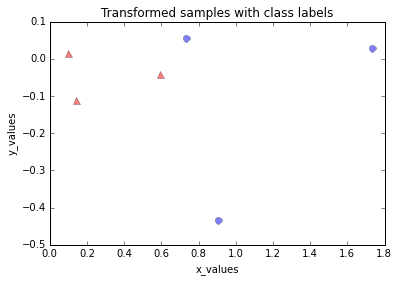

In [48]:
plt.plot(transformed[0,0:3], transformed[1,0:3], 'o', markersize=7, color='blue', alpha=0.5, label='men')
plt.plot(transformed[0,3:6], transformed[1,3:6], '^', markersize=7, color='red', alpha=0.5, label='women')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
#plt.legend()
plt.title('Transformed samples with class labels')

plt.show()



In [45]:
# Just one dimension 
matrix_w2 = np.hstack((eig_pairs[0][1].reshape(3,1),))
print('Matrix W:\n', matrix_w2)



Matrix W:
 [[ 0.561]
 [ 0.608]
 [ 0.562]]


In [46]:
transformed2 = np.dot(X_r.T,matrix_w2).transpose()
print (transformed2)

[[ 1.731  0.733  0.907  0.141  0.593  0.098]]


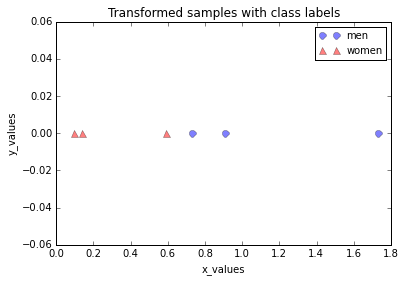

In [47]:
plt.plot(transformed2[0,0:3],[0,0,0], 'o', markersize=7, color='blue', alpha=0.5, label='men')
plt.plot(transformed2[0,3:6],[0,0,0], '^', markersize=7, color='red', alpha=0.5, label='women')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()